In [54]:
import seaborn as sns

In [55]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [57]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [58]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [59]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [60]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Label Encoding for categorical columns
le = LabelEncoder()
for col in ['sex', 'smoker', 'day', 'time']:
    df[col] = le.fit_transform(df[col])

# Features and Target
x = df[['sex', 'smoker', 'day', 'time', 'size', 'total_bill']]
y = df['tip']  # Predicting the actual tip amount

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Scale both features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Reshape & flatten


In [63]:
from sklearn.svm import SVR
# SVR with RBF kernel
svr_model = SVR(kernel='rbf')  # You can also try 'linear' or 'poly'
svr_model.fit(X_train, y_train)


SVR()

In [65]:
from sklearn.metrics import mean_squared_error,r2_score
# Predictions
y_pred_scaled = svr_model.predict(X_test)

# Inverse transform to get actual tip values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_actual = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))

# Metrics
mse = mean_squared_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 17.836467888583353
R² Score: -6.023403618569372


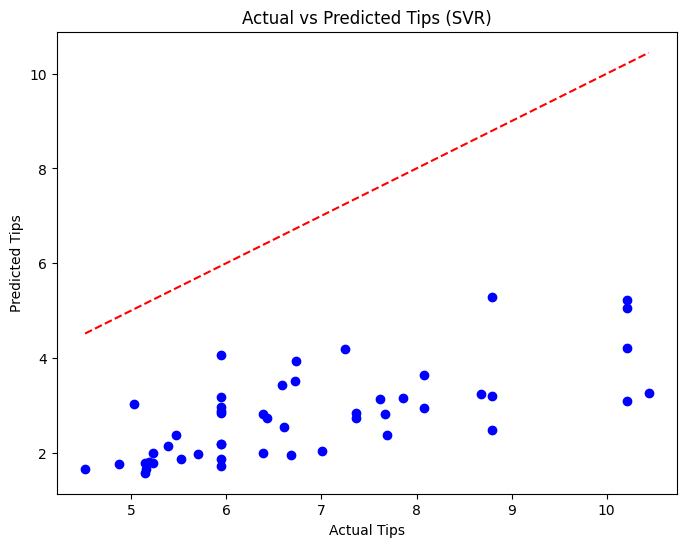

In [67]:
# Plotting Actual vs Predicted Tips
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred, color='blue')
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], 'r--')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted Tips (SVR)')
plt.show()
